In [5]:
"""
Exact-diagonalisation demo for the SIAM with Bethe-fitted bath.
"""

import numpy as np
import matplotlib.pyplot as plt
from andersoned import (
    fit_bethe_bath,
    build_hamiltonian,
    diagonalize,
    green_matsubara,
    green_realaxis,
    spectral_function,
)

In [6]:
U = 4.0
eps_d = -2.0
beta = 50.0
# --- fit Bethe bath (reuse previous routine) --------------------------
eps_p, V_p, *_ = fit_bethe_bath(nbath=4, beta=beta, nw_fit=200)

# --- build & diagonalise many-body Hamiltonian -----------------------
H = build_hamiltonian(U, eps_d, eps_p, V_p)
print(f"Diagonalising ... dim = {H.shape[0]}")
E, Umat = diagonalize(H)
print("done.")

Diagonalising ... dim = 1024
done.


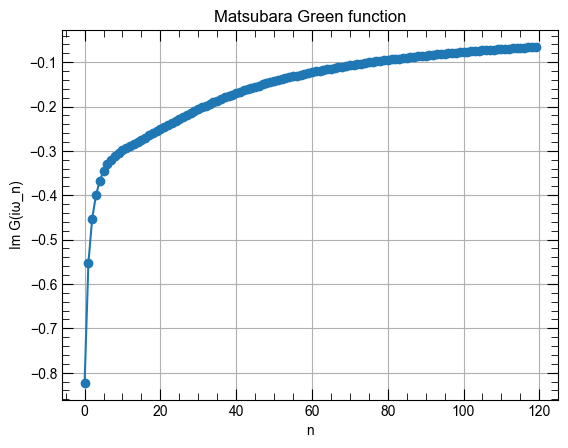

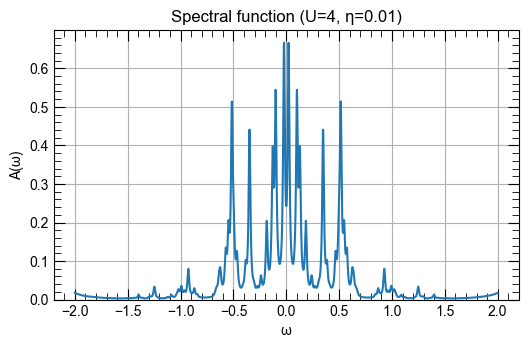

In [7]:
# --- Matsubara Green --------------------------------------------------
Giw = green_matsubara(E, Umat, beta, nw=120)
plt.figure()
plt.plot(Giw.imag, "o-")
plt.xlabel("n")
plt.ylabel("Im G(iω_n)")
plt.title("Matsubara Green function")
plt.grid(True)

# --- Real-axis spectral function -------------------------------------
omega = np.linspace(-2, 2, 2000)
G = green_realaxis(E, Umat, omega, eta=0.01, beta=beta)
A = spectral_function(G)

plt.figure(figsize=(6, 3.5))
plt.plot(omega, A, lw=1.5)
plt.xlabel("ω")
plt.ylabel("A(ω)")
plt.title("Spectral function (U=4, η=0.01)")
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

In [8]:
G

array([ 1.20366263-0.05463759j,  1.19285494-0.05380555j,
        1.18220918-0.0529922j , ..., -1.18220919-0.0529922j ,
       -1.19285494-0.05380555j, -1.20366263-0.05463759j], shape=(2000,))